In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow
from tensorflow import keras
from keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model,load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.applications import VGG16
from PIL import Image

In [ ]:

import zipfile
zip_ref=zipfile.ZipFile(r'/content/drive/MyDrive/op/archive (3).zip','r')
zip_ref.extractall(r'/content')
zip_ref.close()

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 128

base_dir = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"
training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/valid',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
class_names=training_set.class_indices
class_names

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
(def health_model():
   # Initializing the CNN
    classifier = Sequential()
    # Convolution Step 1
    classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
    # Max Pooling Step 1
    classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    classifier.add(BatchNormalization())
    # Convolution Step 2
    classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

    # Max Pooling Step 2
    classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
    classifier.add(BatchNormalization())
    # Convolution Step 3
    classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
    classifier.add(BatchNormalization())
    # Convolution Step 4
    classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
    classifier.add(BatchNormalization())
    # Convolution Step 5
    classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
    # Max Pooling Step 3
    classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    classifier.add(BatchNormalization())
    # Flattening Step
    classifier.add(Flatten())

    # Full Connection Step
    classifier.add(Dense(units = 4096, activation = 'relu'))
    classifier.add(Dropout(0.4))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 4096, activation = 'relu'))
    classifier.add(Dropout(0.4))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 1000, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 38, activation = 'softmax'))
    optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
    classifier.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    return classifier

In [ ]:
def health_model2():
    input_tensor = Input(shape=(224, 224, 3))
    base_model = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)
    base_model.trainable = False

    # Adding custom layers on top of the base model
    x = base_model.output
    x = Flatten()(x)
    x = Dense(units=4096, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)
    x = Dense(units=4096, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)
    x = Dense(units=1000, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    output_tensor = Dense(units=38, activation='softmax')(x)

    # Creating the final model
    classifier = Model(inputs=base_model.input, outputs=output_tensor)

    # Compiling the model
    optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
    classifier.compile(optimizer=optimizer,
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

    return classifier

In [ ]:
model=health_model2()

In [ ]:
model.summary()

Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,432,350 (528.08 MB)

 Trainable params: 123,699,278 (471.88 MB)

 Non-trainable params: 14,733,072 (56.20 MB)

In [ ]:
class_dict = training_set.class_indices
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

In [ ]:
from keras.callbacks import ModelCheckpoint
weightpath = "/kaggle/working/best_weights_9.weights.h5"

checkpoint = ModelCheckpoint(weightpath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max')

callbacks_list = [checkpoint]

In [ ]:
history = model.fit(training_set,
                         steps_per_epoch=min(train_num // batch_size, 50),
                         validation_data=valid_set,
                         epochs=10,
                         validation_steps=min(valid_num // batch_size, 50),
                         callbacks=callbacks_list)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.0419 - loss: 4.2766 - val_accuracy: 0.0573 - val_loss: 3.3879
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.1158 - loss: 3.5356 - val_accuracy: 0.3202 - val_loss: 2.8032
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.1931 - loss: 3.0732 - val_accuracy: 0.4816 - val_loss: 2.3690
Epoch 4/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.2589 - loss: 2.6983 - val_accuracy: 0.4361 - val_loss: 2.2237
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.2933 - loss: 2.4880 - val_accuracy: 0.4483 - val_loss: 2.0473
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.3443 - loss: 2.2304 - val_accuracy: 0.5189 - val_loss: 1.8478
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.3717 - loss: 2.0632 - val_accuracy: 0.4609 - val_loss: 1.8768
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.4056 - loss: 1.9992 - val_accuracy: 0.4645 - val_loss: 1.8363
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.4291 - loss: 1.8965 - val_accuracy: 0.3940 - val_loss: 1.9939
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.4267 - loss: 1.9150 - val_accuracy: 0.4084 - val_loss: 1.9673


In [ ]:
training_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    seed=42,
    image_size= (250,250),
    batch_size=1

)

Found 70295 files belonging to 38 classes.


In [ ]:
class_names=training_ds.class_names

In [ ]:
model=load_model('/content/drive/MyDrive/op/health_model2.h5')

In [ ]:
img_cv2=cv2.resize(cv2.imread('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG'),(250,250))

In [ ]:
img=training_ds.take(1)

In [ ]:
pred=model.predict(np.expand_dims(img_cv2,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Text(0.5, 1.0, 'Tomato___Septoria_leaf_spot')

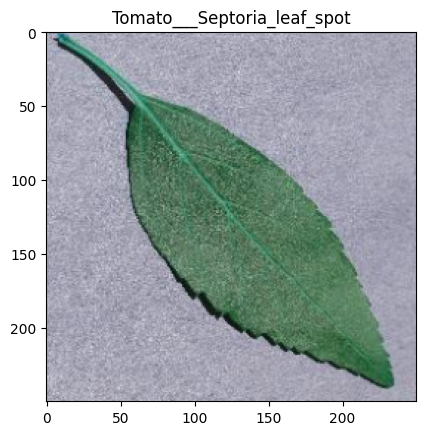

In [ ]:
plt.imshow(img_cv2)
plt.title(class_names[np.argmax(pred)])

In [ ]:
np.argmax(pred[0])

14

In [ ]:
plt.imshow(img[0].numpy().astype("uint8"))
plt.title(class_names[np.argmax(pred[0])])

TypeError: '_TakeDataset' object is not subscriptable

tf.Tensor([10], shape=(1,), dtype=int32)


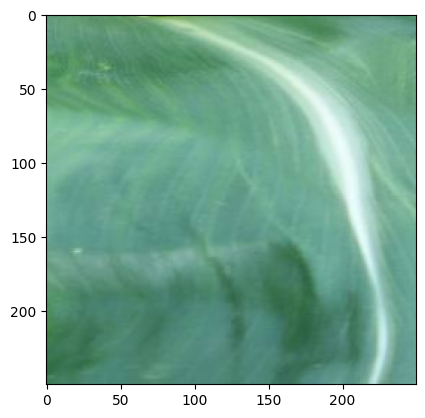

In [ ]:
for img,label in training_ds.take(1):
  plt.imshow(img[0].numpy().astype("uint8"))
  print(label)

In [ ]:
img=cv2.